<a href="https://colab.research.google.com/github/shubhamshuklaa/deep_learning/blob/main/classification_notebook1_breastcancer(tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#installing tensorflow
!pip install "tensorflow<2.11"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
#checking Tensorflow version
import tensorflow as tf
print(tf.__version__)

2.9.2


In [16]:
#load in the data
from sklearn.datasets import load_breast_cancer

In [19]:
data=load_breast_cancer()

In [20]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
data.data.shape

(569, 30)

In [22]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [23]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [24]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(data.data, data.target, test_size=0.33)

In [26]:
N,D=X_train.shape

In [27]:
N,D

(381, 30)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, input_shape=(D,),activation='sigmoid')
])

In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
r=model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.4988 - accuracy: 0.7953 - val_loss: 0.4551 - val_accuracy: 0.8298
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.8189 - val_loss: 0.4140 - val_accuracy: 0.8670
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.4225 - accuracy: 0.8478 - val_loss: 0.3791 - val_accuracy: 0.8883
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3924 - accuracy: 0.8635 - val_loss: 0.3501 - val_accuracy: 0.8936
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3665 - accuracy: 0.8793 - val_loss: 0.3264 - val_accuracy: 0.9043
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3444 - accuracy: 0.8898 - val_loss: 0.3063 - val_accuracy: 0.9043
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.8924 - val_loss: 0.2888 - val_accuracy: 0.9202
Epoch 8/100


# New Section

In [32]:
print('Train_score:', model.evaluate(X_train,y_train))
print('Test_score:',model.evaluate(X_test,y_test))

12/12 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9790
Train_score: [0.09088803827762604, 0.9790025949478149]
6/6 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9787
Test_score: [0.09675469994544983, 0.978723406791687]


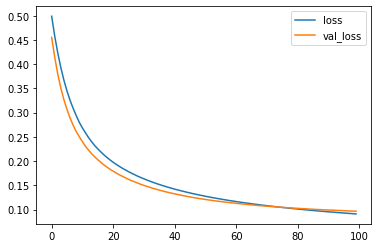

In [33]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

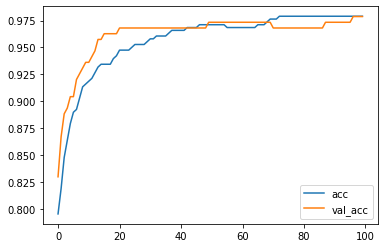

In [34]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend();